In [1]:
%matplotlib inline

import nnsight

from information_flow_routes.metrics import (
    compute_attention_contributions,
    compute_feed_forward_contributions,
    threshold_and_renormalize_contributions,
)
from information_flow_routes.model import (
    capture_inference_components,
    decompose_attention,
    tokens_to_strings,
)
from information_flow_routes.visualization import InformationFlowGraphRenderer

/Users/fpiedrah/.anaconda/envs/information-flow-routes/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
MODEL_NAME = "meta-llama/Llama-3.2-1B-Instruct"

THRESHOLD = 0.03
INDIRECT_IDENTIFICATION_TASK = (
    "When Mary and John went to the store, John gave a drink to"
)

In [12]:
model = nnsight.LanguageModel(MODEL_NAME)
model.config.output_attentions = True

In [15]:
tokens = model.tokenizer(INDIRECT_IDENTIFICATION_TASK, return_tensors="pt")["input_ids"]
string_tokens = tokens_to_strings(model.tokenizer, tokens)
target_token_index = len(string_tokens) - 1

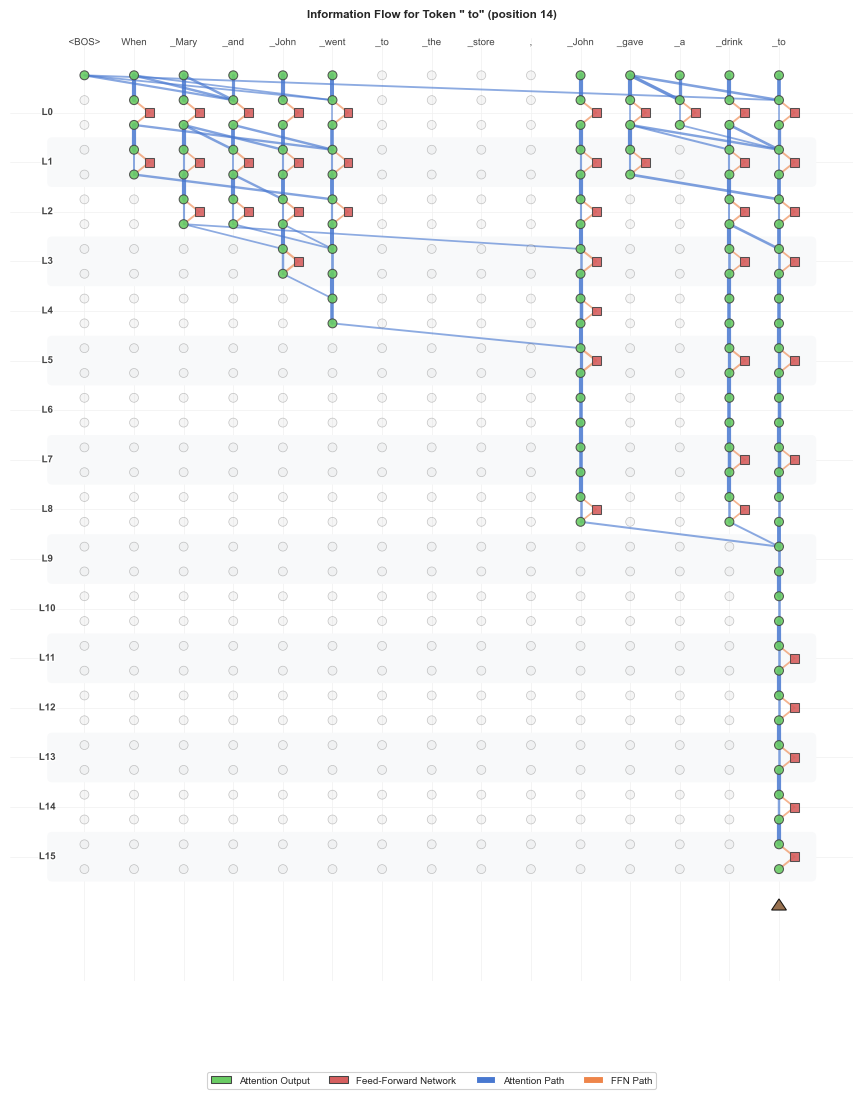

In [16]:
information_flow_graph = construct_information_flow_graph(
    model, INDIRECT_IDENTIFICATION_TASK, THRESHOLD
)

visualizer = InformationFlowGraphRenderer(
    information_flow_graph, string_tokens, target_token_index, THRESHOLD
)

_ = visualizer.plot()